## Importing Important Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,accuracy_score,auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Conv2D,MaxPooling2D, Flatten
df = pd.read_csv("/content/Diabetes.csv")
df.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES


In [10]:
title_mapping = {'YES':1,'NO':0}
df[' Class variable']=df[' Class variable'].map(title_mapping)

## Plotting Zeros Count in Data

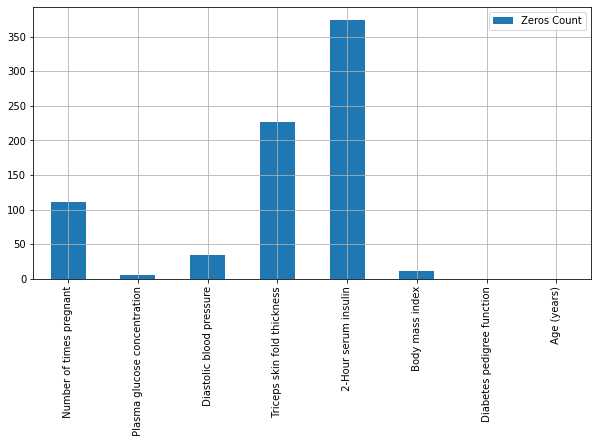

In [11]:
z=(df == 0).sum(axis=0)
z=pd.DataFrame(z)
z.columns=['Zeros Count']
z.drop(' Class variable',inplace=True)
z.plot(kind='bar',stacked=True, figsize=(10,5),grid=True)

In [12]:
col=['n_pregnant','glucose_conc','bp','skin_len','insulin','bmi','pedigree_fun','age','Output']
df.columns=col
df.head()

,n_pregnant,glucose_conc,bp,skin_len,insulin,bmi,pedigree_fun,age,Output
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
diabetes_true_count = len(df.loc[df['Output'] == True])
diabetes_false_count = len(df.loc[df['Output'] == False])
(diabetes_true_count,diabetes_false_count)

(268, 500)

## Replacing 0 with NaN to Handle Easily

In [14]:
col=['glucose_conc','bp','insulin','bmi','skin_len']
for i in col:
    df[i].replace(0, np.nan, inplace= True)

In [15]:
df.isnull().sum()

n_pregnant        0
glucose_conc      5
bp               35
skin_len        227
insulin         374
bmi              11
pedigree_fun      0
age               0
Output            0
dtype: int64

### Function to calculate Median according to the Output

In [16]:
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Output']].groupby(['Output'])[[var]].median().reset_index()
    return temp

In [17]:
median_target('insulin')

,Output,insulin
0,0,102.5
1,1,169.5


In [18]:
median_target('glucose_conc')

,Output,glucose_conc
0,0,107.0
1,1,140.0


In [21]:
median_target('skin_len')

,Output,skin_len
0,0,27.0
1,1,32.0


In [20]:
median_target('bp')

,Output,bp
0,0,70.0
1,1,74.5


In [19]:
median_target('bmi')

,Output,bmi
0,0,30.1
1,1,34.3


## Filling the NaN value with Median according to Output

In [22]:
df.loc[(df['Output'] == 0 ) & (df['insulin'].isnull()), 'insulin'] = 102.5
df.loc[(df['Output'] == 1 ) & (df['insulin'].isnull()), 'insulin'] = 169.5
df.loc[(df['Output'] == 0 ) & (df['glucose_conc'].isnull()), 'glucose_conc'] = 107
df.loc[(df['Output'] == 1 ) & (df['glucose_conc'].isnull()), 'glucose_conc'] = 140
df.loc[(df['Output'] == 0 ) & (df['skin_len'].isnull()), 'skin_len'] = 27
df.loc[(df['Output'] == 1 ) & (df['skin_len'].isnull()), 'skin_len'] = 32
df.loc[(df['Output'] == 0 ) & (df['bp'].isnull()), 'bp'] = 70
df.loc[(df['Output'] == 1 ) & (df['bp'].isnull()), 'bp'] = 74.5
df.loc[(df['Output'] == 0 ) & (df['bmi'].isnull()), 'bmi'] = 30.1
df.loc[(df['Output'] == 1 ) & (df['bmi'].isnull()), 'bmi'] = 34.3

In [23]:
df.isnull().sum()

n_pregnant      0
glucose_conc    0
bp              0
skin_len        0
insulin         0
bmi             0
pedigree_fun    0
age             0
Output          0
dtype: int64

## Box Plot to check for Outliers in the Data

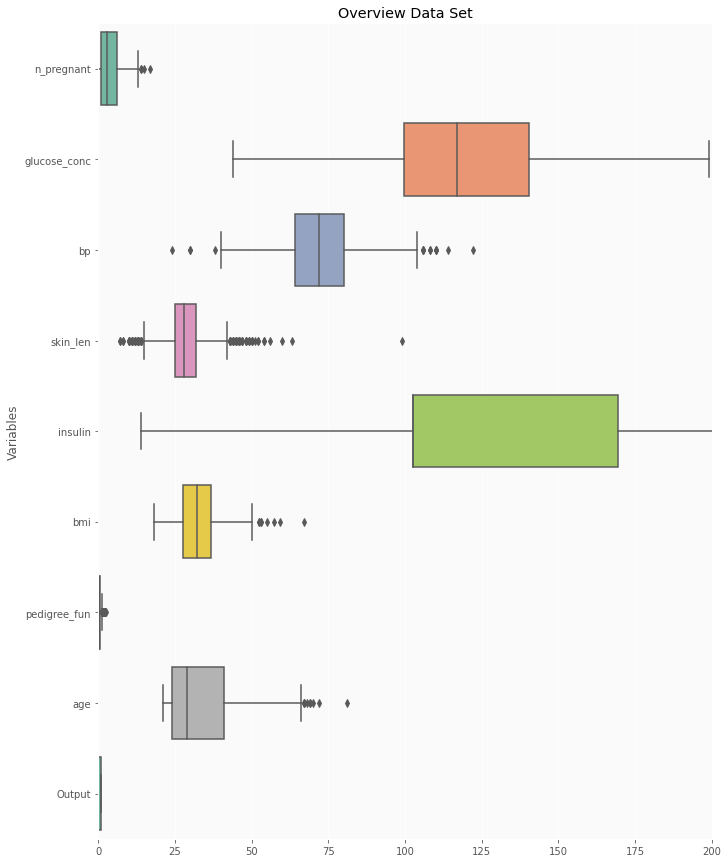

In [24]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = df, 
  orient = 'h', 
  palette = 'Set2')

# Outlier Correction with Median

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


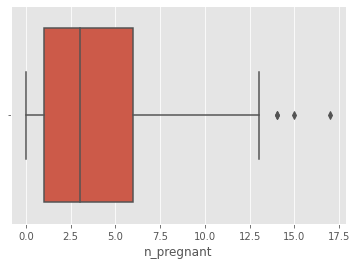

In [25]:
sns.boxplot(df.n_pregnant)

In [26]:
df['n_pregnant'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: n_pregnant, dtype: int64

In [27]:
median_target('n_pregnant')

,Output,n_pregnant
0,0,2.0
1,1,4.0


In [28]:
df.loc[(df['Output'] == 0 ) & (df['n_pregnant']>13), 'n_pregnant'] = 2
df.loc[(df['Output'] == 1 ) & (df['n_pregnant']>13), 'n_pregnant'] = 4

In [29]:
df['n_pregnant'].value_counts()

1     135
0     111
2     103
3      75
4      72
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
Name: n_pregnant, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


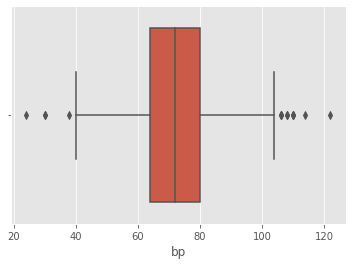

In [30]:
sns.boxplot(df.bp)

In [31]:
median_target('bp')

,Output,bp
0,0,70.0
1,1,74.5


In [32]:
df.loc[(df['Output'] == 0 ) & (df['bp']<40), 'bp'] = 70
df.loc[(df['Output'] == 1 ) & (df['bp']<40), 'bp'] = 74.5

In [33]:
df.loc[(df['Output'] == 0 ) & (df['bp']>103), 'bp'] = 70
df.loc[(df['Output'] == 1 ) & (df['bp']>103), 'bp'] = 74.5

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


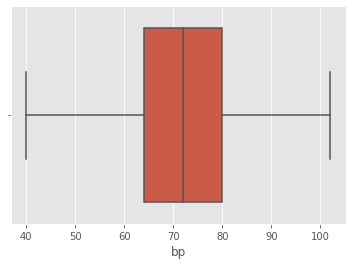

In [34]:
sns.boxplot(df.bp)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


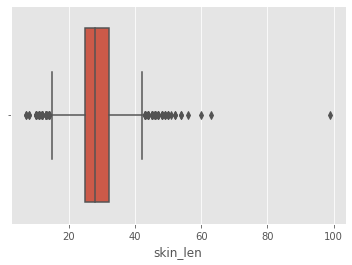

In [35]:
sns.boxplot(df.skin_len)

In [41]:
median_target('skin_len')

,Output,skin_len
0,0,27.0
1,1,32.0


In [42]:
df.loc[(df['Output'] == 0 ) & (df['skin_len']>38), 'skin_len'] = 27
df.loc[(df['Output'] == 1 ) & (df['skin_len']>38), 'skin_len'] = 32

In [43]:
df.loc[(df['Output'] == 0 ) & (df['skin_len']<20), 'skin_len'] = 27
df.loc[(df['Output'] == 1 ) & (df['skin_len']<20), 'skin_len'] = 32

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


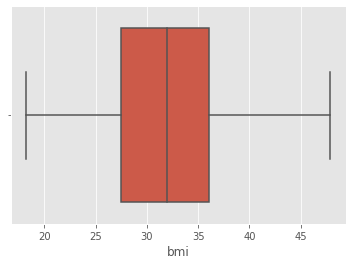

In [44]:
sns.boxplot(df.bmi)

In [45]:
median_target('bmi')

,Output,bmi
0,0,30.1
1,1,34.3


In [46]:
df.loc[(df['Output'] == 0 ) & (df['bmi']>48), 'bmi'] = 30.1
df.loc[(df['Output'] == 1 ) & (df['bmi']>48), 'bmi'] = 34.3

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


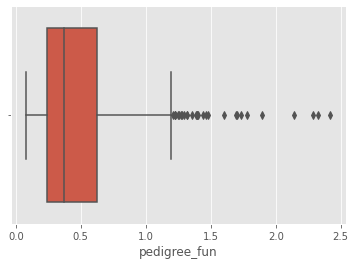

In [47]:
sns.boxplot(df.pedigree_fun)

In [48]:
median_target('pedigree_fun')

,Output,pedigree_fun
0,0,0.336
1,1,0.449


In [49]:
df.loc[(df['Output'] == 0 ) & (df['pedigree_fun']>1), 'pedigree_fun'] = 0.336
df.loc[(df['Output'] == 1 ) & (df['pedigree_fun']>1), 'pedigree_fun'] = 0.449

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


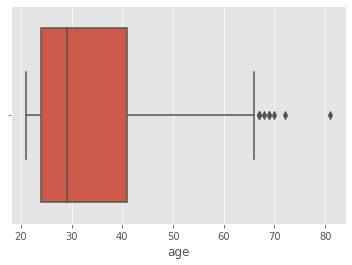

In [50]:
sns.boxplot(df.age)

In [51]:
median_target('age')

,Output,age
0,0,27.0
1,1,36.0


In [52]:
df.loc[(df['Output'] == 0 ) & (df['age']>61), 'age'] = 27
df.loc[(df['Output'] == 1 ) & (df['age']>61), 'age'] = 36

## Splitting the Data

In [53]:
X = df.drop(['Output'], 1)
y = df['Output']

<ipython-input-53-f05757b13d74>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop(['Output'], 1)


In [264]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=95)

## Scaling the Data

In [265]:
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

## SVM With RBF Kernel

In [266]:
model=SVC(kernel='rbf')
model.fit(x_train,y_train)

SVC()

In [267]:
y_pred=model.predict(x_test)

In [268]:
accuracy_score(y_test,y_pred)

0.8961038961038961

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


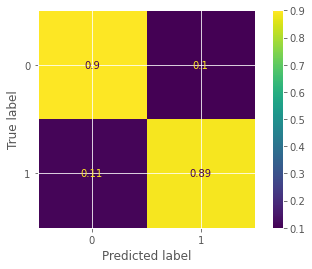

In [269]:
plot_confusion_matrix(model, x_test, y_test, normalize='true')

In [171]:
confusion_matrix(y_test,y_pred)

array([[90, 10],
       [ 6, 48]])

In [172]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       100
           1       0.83      0.89      0.86        54

    accuracy                           0.90       154
   macro avg       0.88      0.89      0.89       154
weighted avg       0.90      0.90      0.90       154



AUC: 0.89


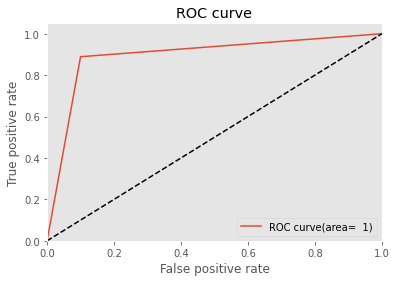

In [270]:
fpr,tpr,_=roc_curve(y_test,y_pred)
#calculate AUC
roc_auc=auc(fpr,tpr)
print('AUC: %0.2f' % roc_auc)
#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

**SVM OPTIMIZATION BY CSA**

ACCURACY: 0.903



In [271]:
# Import necessary libraries
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import math

def crow_search_algorithm(X, y, max_iterations, population_size, a, b):
    # Initialize the population of solutions
    solutions = []
    for i in range(population_size):
        solutions.append(np.random.uniform(-2, 2, size=X.shape[1]))
    
    # Iterate over the maximum number of iterations
    for i in range(max_iterations):
        # Calculate the fitness of each solution
        fitness = []
        for solution in solutions:
            model = svm.SVC(kernel='linear', class_weight={0: solution[0], 1: solution[1]})
            model.fit(X, y)
            accuracy = model.score(X, y)
            test = model.score(x_test, y_test)
            print(f"iter: {i} accuracy: {accuracy}, test: {test}")
            fitness.append(accuracy)
        
        # Sort the solutions based on their fitness
        solutions = [solution for _, solution in sorted(zip(fitness, solutions), key=lambda pair: pair[0])]
        
        # Update the best solution
        best_solution = solutions[-1]
        
        # Update the solutions using the Crow Search Algorithm formula
        for j in range(population_size):
            solution = solutions[j]
            r = np.random.uniform(0, 1)
            if r < a:
                k = np.random.uniform(-1, 1)
                # Exploit the best solution
              
                solution = best_solution + b*(best_solution - solution)+k
            else:
                # Explore the solution space
                solution = np.random.uniform(-2, 2, size=X.shape[1])
            solutions[j] = solution
    
    # Return the best solution
    return best_solution

# Load the Pima Indian Diabetes dataset
# df = pd.read_csv('https://raw.githubusercontent.com/sheetalbongale/Diabetes-Detection-Using-Deep-Learning/main/data/pima-indians-diabetes.csv')

# # Split the data into features and target
# X = df.iloc[:, :-1]
# y = df.iloc[:, -1]
# for r in range(1):
#   # Split the data into training and test sets

# Optimize the SVM model weights using the Crow Search Algorithm
best_weights = crow_search_algorithm(x_train, y_train, max_iterations=20, population_size=10, a=0.1, b=2.2)
# Create the optimized SVM model
model = svm.SVC(kernel='rbf', class_weight={0: best_weights[0], 1: best_weights[1]})
# Train the model on the training data
model.fit(x_train, y_train)
# Test the model on the test data
accuracy = model.score(x_test, y_test)
# Print the accuracy of the model
print(f'Accuracy: {accuracy:.3f}')


iter: 0 accuracy: 0.3485342019543974, test: 0.35064935064935066
iter: 0 accuracy: 0.3485342019543974, test: 0.35064935064935066
iter: 0 accuracy: 0.3485342019543974, test: 0.35064935064935066
iter: 0 accuracy: 0.3485342019543974, test: 0.35064935064935066
iter: 0 accuracy: 0.3485342019543974, test: 0.35064935064935066
iter: 0 accuracy: 0.6514657980456026, test: 0.6493506493506493
iter: 0 accuracy: 0.6514657980456026, test: 0.6493506493506493
iter: 0 accuracy: 0.3485342019543974, test: 0.35064935064935066
iter: 0 accuracy: 0.3485342019543974, test: 0.35064935064935066
iter: 0 accuracy: 0.8094462540716613, test: 0.8116883116883117
iter: 1 accuracy: 0.3485342019543974, test: 0.35064935064935066
iter: 1 accuracy: 0.3485342019543974, test: 0.35064935064935066
iter: 1 accuracy: 0.6514657980456026, test: 0.6493506493506493
iter: 1 accuracy: 0.3485342019543974, test: 0.35064935064935066
iter: 1 accuracy: 0.3485342019543974, test: 0.35064935064935066
iter: 1 accuracy: 0.6514657980456026, test: 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


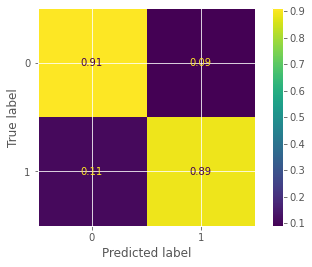

In [272]:
svm_csa_model = model
plot_confusion_matrix(svm_csa_model, x_test, y_test, normalize='true')

**SVM WITH CSA-BESO FOR CLASSIFICATION**

ACCURACY: 91.6

In [274]:
# Import necessary libraries
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import math

# Define the Crow Search Algorithm function
def crow_search_algorithm(X, y, max_iterations, population_size, a, b):
    # Initialize the population of solutions
    r = 2
    solutions = []
    for i in range(population_size):
        solutions.append(np.random.uniform(-2, 2, size=X.shape[1]))
    #sum_solutions = solutions.copy()
    # Iterate over the maximum number of iterations
    for i in range(max_iterations):
        # Calculate the fitness of each solution
        fitness = []
        for solution in solutions:
            model = svm.SVC(kernel='rbf', class_weight={0: solution[0], 1: solution[1]})
            model.fit(X, y)
            accuracy = model.score(X, y)
            test = model.score(x_test, y_test)
            print("iter: ",i,"accuracy: ", accuracy,"test: ",test)
            fitness.append(accuracy)
        # if i>0:
        #   sum_solutions += solutions[-1]
        # # Sort the solutions based on their fitness
        solutions = [solution for _, solution in sorted(zip(fitness, solutions), key=lambda pair: pair[0])]
        # Update the best solution
        best_solution = solutions[-1]
        # Update the solutions using the Crow Search Algorithm formula
        for j in range(population_size):
            solution = solutions[j]
            random_crow = np.random.randint(population_size)
            r = np.random.uniform(0, 1)
            if r < a:
                k = np.random.uniform(-1, 1)
                # Exploit the best solution
                #solution = best_solution + b*(best_solution - solution)+k
                rand = np.random.uniform(-1, 1)
                theta_i = 2*math.pi*rand
                r_i = theta_i+4*rand
                xr_i = r_i*math.sin(theta_i)
                yr_i = r_i*math.cos(theta_i)
                #print("ss".sum_solutions)
                #mean_solution = sum_solutions
                solution = best_solution + yr_i*(best_solution - solution)+xr_i*(solutions[random_crow] - solution)

            else:
                # Explore the solution space
                solution = np.random.uniform(-1, 1, size=X.shape[1])
            solutions[j] = solution
        b = b*6*math.sin(math.pi*b)
    # Return the best solution
    return best_solution

# Load the Pima Indian Diabetes dataset
# df = pd.read_csv('https://raw.githubusercontent.com/sheetalbongale/Diabetes-Detection-Using-Deep-Learning/main/data/pima-indians-diabetes.csv')

# # Split the data into features and target
# X = df.iloc[:, :-1]
# y = df.iloc[:, -1]
# for r in range(1):
#   # Split the data into training and test sets
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

# Optimize the SVM model weights using the Crow Search Algorithm
best_weights = crow_search_algorithm(x_train, y_train, max_iterations=20, population_size=10, a=0.1, b=2.0)
# Create the optimized SVM model
model = svm.SVC(kernel='rbf', class_weight={0: best_weights[0], 1: best_weights[1]})
# Train the model on the training data
model.fit(x_train, y_train)
# Test the model on the test data
accuracy = model.score(x_test, y_test)
# Print the accuracy of the model
print(f'Accuracy: {accuracy:.3f}')


iter:  0 accuracy:  0.6563517915309446 test:  0.6948051948051948
iter:  0 accuracy:  0.35993485342019543 test:  0.3051948051948052
iter:  0 accuracy:  0.35993485342019543 test:  0.3051948051948052
iter:  0 accuracy:  0.6400651465798045 test:  0.6948051948051948
iter:  0 accuracy:  0.6400651465798045 test:  0.6948051948051948
iter:  0 accuracy:  0.6400651465798045 test:  0.6948051948051948
iter:  0 accuracy:  0.35993485342019543 test:  0.3051948051948052
iter:  0 accuracy:  0.35993485342019543 test:  0.3051948051948052
iter:  0 accuracy:  0.35993485342019543 test:  0.3051948051948052
iter:  0 accuracy:  0.35993485342019543 test:  0.3051948051948052
iter:  1 accuracy:  0.6400651465798045 test:  0.6948051948051948
iter:  1 accuracy:  0.6433224755700325 test:  0.6948051948051948
iter:  1 accuracy:  0.35993485342019543 test:  0.3051948051948052
iter:  1 accuracy:  0.35993485342019543 test:  0.3051948051948052
iter:  1 accuracy:  0.35993485342019543 test:  0.3051948051948052
iter:  1 accurac

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


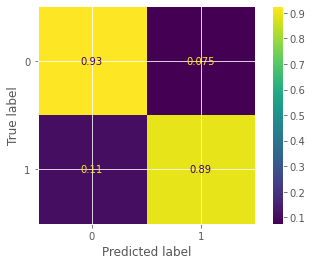

In [275]:
svm_csa_beso_model = model
plot_confusion_matrix(svm_csa_beso_model, x_test, y_test, normalize='true')

**RANDOM FOREST RFE FEATURE SELECTION**

In [276]:
# Load libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

clf = RandomForestClassifier(random_state=28)

# Create the RFE model and select 3 attributes
rfe = RFE(clf)
rfe = rfe.fit(X,y)

# Print the feature ranking
print(X.columns)
print(rfe.ranking_)
print(X.columns[rfe.support_])
X_selected = X[X.columns[rfe.support_]]
print(X_selected)

Index(['n_pregnant', 'glucose_conc', 'bp', 'skin_len', 'insulin', 'bmi',
       'pedigree_fun', 'age'],
      dtype='object')
[4 1 5 1 1 2 3 1]
Index(['glucose_conc', 'skin_len', 'insulin', 'age'], dtype='object')
     glucose_conc  skin_len  insulin  age
0           148.0      35.0    169.5   50
1            85.0      29.0    102.5   31
2           183.0      32.0    169.5   32
3            89.0      23.0     94.0   21
4           137.0      35.0    168.0   33
..            ...       ...      ...  ...
763         101.0      27.0    180.0   27
764         122.0      27.0    102.5   27
765         121.0      23.0    112.0   30
766         126.0      32.0    169.5   47
767          93.0      31.0    102.5   23

[768 rows x 4 columns]


**SVM CLASSIFICATION SELECTED FEATURES**

ACCURACY: 0.935

In [277]:
x_train,x_test,y_train,y_test=train_test_split(X_selected,y,test_size=0.2,random_state=95)
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)
model=SVC(kernel='rbf')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.935064935064935

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


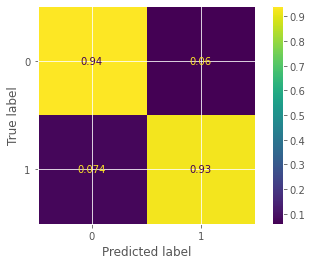

In [278]:
plot_confusion_matrix(model, x_test, y_test, normalize='true')

**SVM-CSA CLASSIFICATION**

Accuracy: 0.942

In [252]:
# Import necessary libraries
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import math

def crow_search_algorithm(X, y, max_iterations, population_size, a, b):
    # Initialize the population of solutions
    solutions = []
    for i in range(population_size):
        solutions.append(np.random.uniform(-2, 2, size=X.shape[1]))
    
    # Iterate over the maximum number of iterations
    for i in range(max_iterations):
        # Calculate the fitness of each solution
        fitness = []
        for solution in solutions:
            model = svm.SVC(kernel='rbf', class_weight={0: solution[0], 1: solution[1]})
            model.fit(X, y)
            accuracy = model.score(X, y)
            test = model.score(x_test, y_test)
            print(f"iter: {i} accuracy: {accuracy}, test: {test}")
            fitness.append(accuracy)
        
        # Sort the solutions based on their fitness
        solutions = [solution for _, solution in sorted(zip(fitness, solutions), key=lambda pair: pair[0])]
        
        # Update the best solution
        best_solution = solutions[-1]
        
        # Update the solutions using the Crow Search Algorithm formula
        for j in range(population_size):
            solution = solutions[j]
            r = np.random.uniform(0, 1)
            if r < a:
                k = np.random.uniform(-1, 1)
                # Exploit the best solution
              
                solution = best_solution + b*(best_solution - solution)+k
            else:
                # Explore the solution space
                solution = np.random.uniform(-2, 2, size=X.shape[1])
            solutions[j] = solution
    
    # Return the best solution
    return best_solution

# Load the Pima Indian Diabetes dataset
# df = pd.read_csv('https://raw.githubusercontent.com/sheetalbongale/Diabetes-Detection-Using-Deep-Learning/main/data/pima-indians-diabetes.csv')

# # Split the data into features and target
# X = df.iloc[:, :-1]
# y = df.iloc[:, -1]
# for r in range(1):
#   # Split the data into training and test sets

# Optimize the SVM model weights using the Crow Search Algorithm
best_weights = crow_search_algorithm(x_train, y_train, max_iterations=20, population_size=10, a=0.1, b=0.9)
# Create the optimized SVM model
model = svm.SVC(kernel='rbf', class_weight={0: best_weights[0], 1: best_weights[1]})
# Train the model on the training data
model.fit(x_train, y_train)
# Test the model on the test data
accuracy = model.score(x_test, y_test)
# Print the accuracy of the model
print(f'Accuracy: {accuracy:.3f}')


iter: 0 accuracy: 0.3485342019543974, test: 0.35064935064935066
iter: 0 accuracy: 0.750814332247557, test: 0.7532467532467533
iter: 0 accuracy: 0.6514657980456026, test: 0.6493506493506493
iter: 0 accuracy: 0.6514657980456026, test: 0.6493506493506493
iter: 0 accuracy: 0.6514657980456026, test: 0.6493506493506493
iter: 0 accuracy: 0.3485342019543974, test: 0.35064935064935066
iter: 0 accuracy: 0.3485342019543974, test: 0.35064935064935066
iter: 0 accuracy: 0.6514657980456026, test: 0.6493506493506493
iter: 0 accuracy: 0.6514657980456026, test: 0.6493506493506493
iter: 0 accuracy: 0.3485342019543974, test: 0.35064935064935066
iter: 1 accuracy: 0.6514657980456026, test: 0.6493506493506493
iter: 1 accuracy: 0.3485342019543974, test: 0.35064935064935066
iter: 1 accuracy: 0.3485342019543974, test: 0.35064935064935066
iter: 1 accuracy: 0.3485342019543974, test: 0.35064935064935066
iter: 1 accuracy: 0.3485342019543974, test: 0.35064935064935066
iter: 1 accuracy: 0.3485342019543974, test: 0.35

Accuracy: 0.94
[ 1.65760115  1.40264966 -1.14640625  1.6796343 ]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


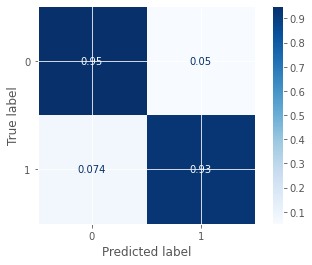

In [253]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

svm_csa = model

accuracy = model.score(x_test, y_test)
# Print the accuracy of the model
print(f'Accuracy: {accuracy:.2f}')
plot_confusion_matrix(svm_csa, x_test, y_test, cmap='Blues', normalize='true')
print(best_weights)

In [260]:
import matplotlib.pyplot as plt

def plot_curves(model,X,y):
  plot_confusion_matrix(model, x_test, y_test, normalize='true')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


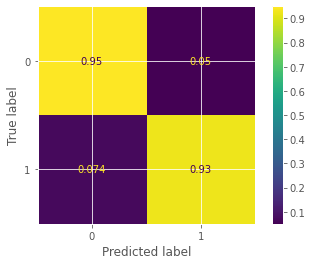

In [261]:
plot_curves(svm_csa, X_selected,y)

**SVM-CSA-BESO CLASSIFICATION**

ACCURACY: 0.95




In [225]:
# Import necessary libraries
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import math

# Define the Crow Search Algorithm function
def crow_search_algorithm(X, y, max_iterations, population_size, a, b):
    # Initialize the population of solutions
    r = 2
    solutions = []
    for i in range(population_size):
        solutions.append(np.random.uniform(-2, 2, size=X.shape[1]))
    #sum_solutions = solutions.copy()
    # Iterate over the maximum number of iterations
    for i in range(max_iterations):
        # Calculate the fitness of each solution
        fitness = []
        for solution in solutions:
            model = svm.SVC(kernel='linear', class_weight={0: solution[0], 1: solution[1]})
            model.fit(X, y)
            accuracy = model.score(X, y)
            test = model.score(x_test, y_test)
            print("iter: ",i,"accuracy: ", accuracy,"test: ",test)
            fitness.append(accuracy)
        # if i>0:
        #   sum_solutions += solutions[-1]
        # # Sort the solutions based on their fitness
        solutions = [solution for _, solution in sorted(zip(fitness, solutions), key=lambda pair: pair[0])]
        # Update the best solution
        best_solution = solutions[-1]
        # Update the solutions using the Crow Search Algorithm formula
        for j in range(population_size):
            solution = solutions[j]
            random_crow = np.random.randint(population_size)
            r = np.random.uniform(0, 1)
            if r < a:
                k = np.random.uniform(-1, 1)
                # Exploit the best solution
                #solution = best_solution + b*(best_solution - solution)+k
                rand = np.random.uniform(-1, 1)
                theta_i = 2*math.pi*rand
                r_i = theta_i+4*rand
                xr_i = r_i*math.sin(theta_i)
                yr_i = r_i*math.cos(theta_i)
                #print("ss".sum_solutions)
                #mean_solution = sum_solutions
                solution = best_solution + yr_i*(best_solution - solution)+xr_i*(best_solution - solution)

            else:
                # Explore the solution space
                solution = np.random.uniform(-3, 3, size=X.shape[1])
            solutions[j] = solution
       # b = b*2*math.sin(math.pi*b)
    # Return the best solution
    return best_solution

# Load the Pima Indian Diabetes dataset
# df = pd.read_csv('https://raw.githubusercontent.com/sheetalbongale/Diabetes-Detection-Using-Deep-Learning/main/data/pima-indians-diabetes.csv')

# # Split the data into features and target
# X = df.iloc[:, :-1]
# y = df.iloc[:, -1]
# for r in range(1):
#   # Split the data into training and test sets

# Optimize the SVM model weights using the Crow Search Algorithm
best_weights = crow_search_algorithm(x_train, y_train, max_iterations=20, population_size=10, a=0.1, b=0.8)
# Create the optimized SVM model
model = svm.SVC(kernel='rbf', class_weight={0: best_weights[0], 1: best_weights[1]})
# Train the model on the training data
model.fit(x_train, y_train)
# Test the model on the test data
accuracy = model.score(x_test, y_test)
# Print the accuracy of the model
print(f'Accuracy: {accuracy:.3f}')


iter:  0 accuracy:  0.7703583061889251 test:  0.7792207792207793
iter:  0 accuracy:  0.6514657980456026 test:  0.6493506493506493
iter:  0 accuracy:  0.3485342019543974 test:  0.35064935064935066
iter:  0 accuracy:  0.3485342019543974 test:  0.35064935064935066
iter:  0 accuracy:  0.3485342019543974 test:  0.35064935064935066
iter:  0 accuracy:  0.3485342019543974 test:  0.35064935064935066
iter:  0 accuracy:  0.8322475570032574 test:  0.8506493506493507
iter:  0 accuracy:  0.3485342019543974 test:  0.35064935064935066
iter:  0 accuracy:  0.3485342019543974 test:  0.35064935064935066
iter:  0 accuracy:  0.6514657980456026 test:  0.6493506493506493
iter:  1 accuracy:  0.6514657980456026 test:  0.6493506493506493
iter:  1 accuracy:  0.3485342019543974 test:  0.35064935064935066
iter:  1 accuracy:  0.8257328990228013 test:  0.8506493506493507
iter:  1 accuracy:  0.8420195439739414 test:  0.8441558441558441
iter:  1 accuracy:  0.6514657980456026 test:  0.6493506493506493
iter:  1 accuracy:

Accuracy: 0.95
[ 1.90884817  1.30847572 -1.43494883 -2.62415266]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


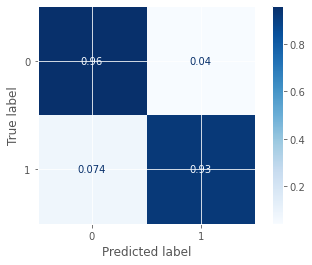

In [241]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

svm_csa_beso = model

accuracy = model.score(x_test, y_test)
# Print the accuracy of the model
print(f'Accuracy: {accuracy:.2f}')
plot_confusion_matrix(svm_csa_beso, x_test, y_test, cmap='Blues', normalize='true')
print(best_weights)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


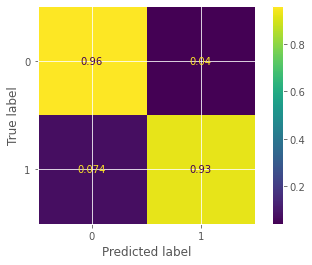

In [262]:
plot_curves(svm_csa_beso,X_selected,y)

## SVM With Linear Kernel

In [62]:
model=SVC(kernel='linear')
model.fit(x_train,y_train)

SVC(kernel='linear')

In [63]:
y_pred=model.predict(x_test)

In [64]:
accuracy_score(y_test,y_pred)

0.8961038961038961

In [65]:
confusion_matrix(y_test,y_pred)

array([[96, 11],
       [ 5, 42]])

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       107
           1       0.79      0.89      0.84        47

    accuracy                           0.90       154
   macro avg       0.87      0.90      0.88       154
weighted avg       0.90      0.90      0.90       154



ROC AUC: 0.90


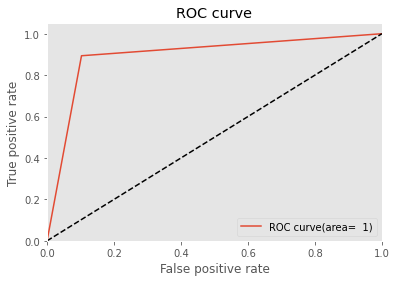

In [67]:
fpr,tpr,_=roc_curve(y_test,y_pred)
#calculate AUC
roc_auc=auc(fpr,tpr)
print('ROC AUC: %0.2f' % roc_auc)
#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Artificial Neural Networks

In [164]:
model = Sequential()
model.add(Dense(32,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(64,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(64,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(128,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(128,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(256,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(256,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))

In [165]:
print(model.summary())
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="sgd",metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=10, epochs=50, verbose=1, validation_data=(x_test, y_test))
loss, accuracy = model.evaluate(x_test,y_test, verbose=0)
print("Loss : "+str(loss))
print("Accuracy :"+str(accuracy*100.0))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                160       
                                                                 
 activation_8 (Activation)   (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 activation_9 (Activation)   (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 activation_10 (Activation)  (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 128)              